# Importing stock listing data from Excel

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline 

## Import stock listing info from the NASDAQ

In this video, you learned how to use the pd.read_csv() function to import data from a csv file containing companies listed on the AmEx Stock Exchange into a pandas DataFrame. You can apply this same knowledge to import listing information in csv files from other stock exchanges.

The next step is to ensure that the contents of the DataFrame accurately reflect the meaning of your data. Two essential methods to understand your data are .head(), which displays the first five rows of your data by default, and .info(), which summarizes elements of a DataFrame such as content, data types, and missing values.

In this exercise, you will read the file nasdaq-listings.csv with data on companies listed on the NASDAQ and then diagnose issues with the imported data. You will fix these issues in the next exercise.

In [3]:

# Import pandas library
import pandas as pd

# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv')

# Display first 10 rows
print(nasdaq.head(10))

# Inspect nasdaq
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   
5           FB         Facebook, Inc.     139.39           4.030000e+11   
6        CMCSA    Comcast Corporation      37.14           1.760000e+11   
7         INTC      Intel Corporation      35.25           1.660000e+11   
8         CSCO    Cisco Systems, Inc.      32.42           1.620000e+11   
9         AMGN             Amgen Inc.     161.61           1.190000e+11   

  IPO Year             Sector  \
0     1980         Technology   
1      NAN         Technology   
2     2004         Technology   
3     1986         Technology   
4     199

## How to fix the data import?

Two optional arguments that you can add to .read_csv() to better represent the data from an external file are:

    na_values: Converts a given string to np.nan, defaults to None
    parse_dates: Reads the data in a list of given columns as dtype datetime64, defaults to False

Which of the following steps should you take to make sure that the data imported from nasdaq-listings.csv are accurately represented?

The nasdaq DataFrame that you created in the previous exercise is available in your workspace.

## Read data using .read_csv() with adequate parsing arguments

You have successfully identified the issues you must address when importing the given csv file.

In this exercise, you will once again load the NASDAQ data into a pandas DataFrame, but with a more robust function.

In [4]:
# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])

# Display the head of the data
print(nasdaq.head())

# Inspect the data
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   

   IPO Year             Sector  \
0    1980.0         Technology   
1       NaN         Technology   
2    2004.0         Technology   
3    1986.0         Technology   
4    1997.0  Consumer Services   

                                          Industry Last Update  
0                           Computer Manufacturing  2017-04-26  
1  Computer Software: Programming, Data Processing  2017-04-24  
2  Computer Software: Programming, Data Processing  2017-04-23  
3          Computer Software: Prepackaged Software  2017-04-26  
4                  

## Load listing info from a single sheet

As you just learned, you can import data from a sheet of an Excel file with the pd.read_excel() function by assigning the optional sheet_name argument to an integer indicating its position or a string containing its name.

pandas.read_excel(file, sheetname=0, na_values=None, ...)

Here, you will practice by importing NYSE data from a new file, listings.xlsx.

In [5]:
# Import the data
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')

# Display the head of the data
print(nyse.head())

# Inspect the data
nyse.info()

  Stock Symbol            Company Name  Last Sale  Market Capitalization  \
0          DDD  3D Systems Corporation      14.48           1.647165e+09   
1          MMM              3M Company     188.65           1.127366e+11   
2         WBAI         500.com Limited      13.96           5.793129e+08   
3         WUBA             58.com Inc.      36.11           5.225238e+09   
4          AHC   A.H. Belo Corporation       6.20           1.347351e+08   

   IPO Year             Sector  \
0       NaN         Technology   
1       NaN        Health Care   
2    2013.0  Consumer Services   
3    2013.0         Technology   
4       NaN  Consumer Services   

                                          Industry  
0          Computer Software: Prepackaged Software  
1                       Medical/Dental Instruments  
2            Services-Misc. Amusement & Recreation  
3  Computer Software: Programming, Data Processing  
4                             Newspapers/Magazines  
<class 'pandas.core.

## Load listing data from two sheets

The import process is just as intuitive when using the sheet_names attribute of a pd.ExcelFile() object.

Passing in a list as the sheetname argument of pd.read_excel(), whether you assign the list to a variable holding the sheet_names attribute of a pd.ExcelFile() object or type the list out yourself, constructs a dictionary. In this dictionary, the keys are the names of the sheets, and the values are the DataFrames containing the data from the corresponding sheet. You can extract values from a dictionary by providing a particular key in brackets.

In this exercise, you will retrieve the list of stock exchanges from listings.xlsx and then use this list to read the data for all three exchanges into a dictionary.

In [36]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheet_name=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


## Load all listing data and iterate over key-value dictionary pairs

You already know that a pd.DataFrame() object is a two-dimensional labeled data structure. As you saw in the video, the pd.concat() function is used to concatenate, or vertically combine, two or more DataFrames. You can also use broadcasting to add new columns to DataFrames.

In this exercise, you will practice using this new pandas function with the data from the NYSE and NASDAQ exchanges.

In [7]:
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


## Automate the loading and combining of data from multiple Excel worksheets

You are now ready to automate the import process of listing information from all three exchanges in the Excel file listings.xlsx by implementing a for loop. Let's look at what you'll do:

    Retrieve the sheet names of a pd.ExcelFile() object using its sheet_names attribute.
    Create an empty list.
    Write a for loop that iterates through these sheet names to read the data from the corresponding sheet name in the Excel file into a variable. Add a reference column, if desired. Append the contents of this variable to the list with each iteration.
    Concatenate the DataFrames in the list.

As always, refer to the previous exercises in this chapter or the pandas documentation if you need any help.

In [8]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


# Importing financial data from the web

## Get stock data for a single company

Google Finance has deprecated their API but DataReader now makes available the data source 'iex'.

The most important change to the functionality is the limitation of the data to the last five years.

Retrieving stock price data from IEX is simple after importing the DataReader package and using the start and/or end arguments in form date(YYYY, MM, DD):

    stock_data = DataReader(ticker, data_source, start, end)

In the first chapter, you learned that a stock ticker is the unique symbol needed to get stock information for a certain company.

In this exercise, you will practice importing the 2016 data for Apple, with ticker 'AAPL'.

In [12]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'iex'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

               open     high      low    close    volume
date                                                    
2016-01-04  96.9111  99.5159  96.3350  99.4989  67649387
2016-01-05  99.8767  99.9711  96.7222  97.0055  55790992
2016-01-06  94.9749  96.6844  94.3233  95.1072  68457388
2016-01-07  93.1993  94.5688  91.0743  91.0932  81094428
2016-01-08  93.0766  93.6055  91.3860  91.5749  70798016
<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 5 columns):
open      252 non-null float64
high      252 non-null float64
low       252 non-null float64
close     252 non-null float64
volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


## Visualize a stock price trend

Google Finance has deprecated their API but DataReader now makes available the data source 'iex'.

The most important change to the functionality is the limitation of the data to the last five years. The DataFrame returned by the DataReader has the same columns, but in lower case.

The matplotlib.pyplot package is essential to visualizing stock price trends in Python.

In this exercise, you will import 2016 stock price data for Facebook, and then plot its closing price for the entire period!

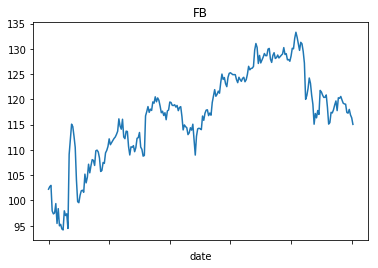

In [13]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)

# Set the ticker and data_source
ticker = 'FB'
data_source = 'iex'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot close
stock_prices['close'].plot(title=ticker)

# Show the plot
plt.show()

## Visualize the long-term gold price trend

In the previous video, you learned how to retrieve data from the Federal Reserve Economic Data (FRED) portal.

Here, you will use this new data source to visualize the gold price trend over the last 50 years, specifically, the Gold Fixing Price 10:30 AM (London time) in London Bullion Market, in US Dollars.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13280 entries, 1968-04-01 to 2019-02-22
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12871 non-null float64
dtypes: float64(1)
memory usage: 207.5 KB


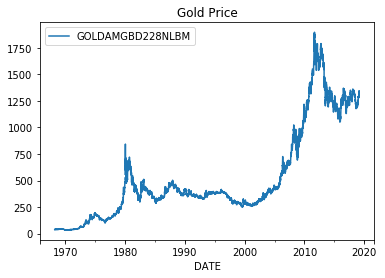

In [14]:
# Set start date
start = date(1968, 1, 1)

series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()

## Compare labor market participation and unemployment rates

Two economic data series in FRED are the Civilian Unemployment Rate ('UNRATE') and the Civilian Labor Force Participation Rate ('CIVPART').

These rates highlight two important aspects of the US labor market: the share of the civilian population that is currently unemployed or seeking employment, and the share of those active in the labor market that are in fact employed.

This means that the numbers indicate both the size of the labor market relative to the total population, as well as the size of unemployment relative to the labor market.

Here, you will import, modify, and plot the data.

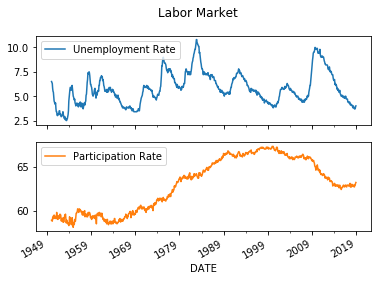

In [15]:
# Set the start date
start = date(1950, 1, 1)

# Define the series code
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

## Compare bond and stock performance

Bonds and stocks are the most important investment alternatives. Now that you can import data from both the Federal Reserve and Google Finance, you can compare the performance of both asset classes. You'll be using a Total Return Index for each class, which accounts for returns due to both price increases and payments like interest or dividends.

For bonds, you'll use the Bank of America Merrill Lynch US High Yield Total Return Index Value ('BAMLHYH0A0HYM2TRIV'). For stocks, you'll use the S&P 500 Index ('SP500'). Both are available for the past 10 years from the Federal Reserve's FRED service.

In this exercise, you will download both series and compare their performance.

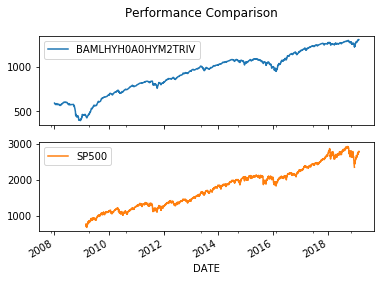

In [17]:
# Set the start date
start = date(2008, 1, 1)

# Set the series code
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots=True, title='Performance Comparison')

# Show the plot
plt.show()

## Select the top 5 listed consumer companies

As you have just learned, it is possible to filter stocks based on criteria with the sort_values() method and an argument that specifies the column to filter by. Additionally, you can include the argument ascending=False to sort entries from highest to lowest.

Here, you will use this function to find out the five most valuable companies in the Consumer Services sector. This is measured with market capitalization, or the combined value of all shares in a company.

In [21]:
# Select companies in Consumer Services
consumer_services = listing_data[listing_data.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
print(consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head())

                   Company Name Exchange  Market Capitalization
4              Amazon.com, Inc.   nasdaq           4.221385e+11
3013      Wal-Mart Stores, Inc.     nyse           2.218646e+11
3014  Walt Disney Company (The)     nyse           1.789973e+11
6           Comcast Corporation   nasdaq           1.764745e+11
1438     Home Depot, Inc. (The)     nyse           1.752626e+11


## Get the ticker of the largest consumer services company

Google Finance has deprecated their API but DataReader now makes available the data source 'iex' that provides the same functionality without registration while limiting data to the last five years.

Instead of indexing your data with a conditional expression, you can also filter by certain values with .loc[row_selector, column_selector]. Additionally, you can use .set_index() to set a particular column with unique values as the index of a DataFrame, and .idxmax() to return the index of the maximum value.

In this exercise, you will apply these methods of selecting companies to find the most valuable consumer services company on any of the three exchanges, and use its ticker to plot its stock price trend.

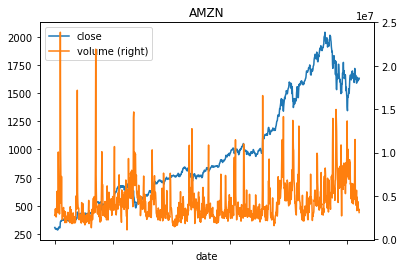

In [23]:
# Set the index of listings to Stock Symbol
listings_ss = listing_data.set_index('Stock Symbol')

# Get ticker of the largest Consumer Services company
ticker = listings_ss.loc[listings_ss.Sector == 'Consumer Services', 'Market Capitalization'].idxmax()

# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = DataReader(ticker, 'iex', start)

# Plot close and volume
data[['close', 'volume']].plot(secondary_y='volume', title=ticker)

# Show the plot
plt.show()

## Get the largest consumer company listed after 1998

Google Finance has deprecated their API but DataReader now makes available instead the data source 'iex'.

The functionality using 'iex' is the same except: data is limited to the last five years, column headers are lower case.

You can filter your data by even more conditions by enclosing each condition in parentheses and using logical operators like & and |.

Here, you will find out which company is the largest consumer services company that went public after Amazon did in 1997. The data is contained in the column 'IPO Year'; an Initial Public Offering (IPO) is a financial term that describes the first time that the stock of a private company is offered to the public.

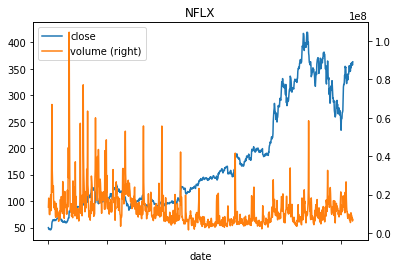

In [25]:
# Set Stock Symbol as the index
listings = listing_data.set_index('Stock Symbol')

# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings.Sector == 'Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = DataReader(ticker, 'iex', start)

# Plot close and volume
data[['close', 'volume']].plot(secondary_y='volume', title=ticker)

# Show the plot
plt.show()

## Get data for the 3 largest financial companies

Google Finance has deprecated their API but DataReader now makes available instead the data source 'iex'.

The functionality using 'iex' is the same except: data is limited to the last five years, column headers are lower case, and for multiple tickers the return value is a dictionary rather than a pandas.Panel. We have included a few lines of code in the exercise to convert the dictionary into a DataFrame with MultiIndex like in the video.

A pd.MultiIndex() object has more than one identifier per row. This allows you to get the data based on criteria for multiple companies at once.

Let's apply this new skill to get the stock prices for the largest companies in the financial sector. DataReader, date, pandas as pd, and matplotlib.pyplot as plt have been imported, as has the listings DataFrame from the last exercise.

In [26]:
# Set Stock Symbol as the index
listings_ss = listing_data.set_index('Stock Symbol')

# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[listings_ss.Sector == 'Finance', 'Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2015, 1, 1)

# Import stock data
result = DataReader(top_3_tickers, 'iex', start)

data = pd.DataFrame()
for ticker in result.columns.levels[1]:
    index = pd.MultiIndex.from_arrays([
            [ticker] * len(result),
            result.index.values
            ], names=['ticker', 'date'])
    ticker_df = pd.DataFrame(index=index)
    for col in result.columns.levels[0]:
        ticker_df[col] = result[col][ticker].values
    data = pd.concat([data, ticker_df])

# Unstack and inspect result
data['close'].unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, BAC to WFC
Columns: 1042 entries, 2015-01-02 to 2019-02-22
dtypes: float64(1042)
memory usage: 24.4+ KB


# Summarizing your data and visualizing the result

## List the poorest and richest countries worldwide

The values of numerical variables are numbers. They can be described by measures of central tendency, or the most typical value in a dataset, and dispersion, which represents the spread of a distribution.

In the next few exercises, you will use these statistics to explore the data in 'per_capita_income.csv', which contains the average income earned per person in a given country. The first step in analyzing aspects of the global income distribution is to inspect and familiarize yourself with the data.

In [27]:
# Import the data
income = pd.read_csv('per_capita_income.csv')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

# Display the first and last five rows
print(income.head())
print(income.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
Country              184 non-null object
Income per Capita    184 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
               Country  Income per Capita
133              Qatar       141542.66280
97    Macao SAR, China       111496.62940
96          Luxembourg       102051.68030
144          Singapore        85382.30227
23   Brunei Darussalam        78369.29102
                      Country  Income per Capita
121                     Niger         955.483324
94                    Liberia         835.366935
37           Congo, Dem. Rep.         784.365232
26                    Burundi         727.150789
31   Central African Republic         618.752859


## Global incomes: Central tendency

The most common measures of central tendency are the mean, which is equal to the sum of all values divided by the total number of values, median, which separates the upper half of data from the lower half, and mode, which is the most frequent value in the data set. The pandas package contains functions that can calculate each of these.

In this data set, the values for 'Income per Capita' are floats, and there are no repeat values, so running income['Income per Capita'].mode() in your console returns an empty series. Here, you will use the floor division operator // to add a new column that measures income in thousands, rounded down, so that a value such as 11,543.43 becomes just 11. Then, you will run the above functions to better understand how incomes are distributed.

In [28]:
# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

19469.41956573696
11620.932519999998


0    1.0
dtype: float64

## Global incomes: Dispersion

A quantile is a measure of dispersion created by dividing a frequency distribution of a DataFrame into even groups. You can return values at the given quantile q of a DataFrame df with the command df.quantile(q); likewise, supplying a list as q will return a value for each given quantile.

Here, you will continue your analysis of global income distribution using two measures of dispersion: the standard deviation, or square root of variance, and the interquartile range (IQR).

In [29]:
# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation 
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean - std, mean + std]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([.25, .75])
print(quantiles)

# Calculate and print IQR
iqr = quantiles[.75] - quantiles[.25]
print(iqr)

[-2497.4416414691186, 41436.280772943035]
0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64
22636.39573


## Deciles of the global income distribution

A decile is a special kind of quantile obtained by dividing the distribution of a particular dataset by ten. Deciles (as well as any other kind of quantile) can be created by supplying the following numpy function to .quantile(), where start is the beginning of the interval (inclusive), stop is the end of the interval (exclusive), and step is the spacing between any two adjacent values:

np.arange(start, stop, step)

As you saw in the video, a standard bar graph is a great way to visualize the distribution of data. You can create one by adding kind='bar' as an argument to .plot().

Now it's your turn to apply this knowledge to plot a summary of the income distribution in deciles!

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0.1     1805.906426
0.2     3177.255688
0.3     5506.323195
0.4     8510.729683
0.5    11620.932520
0.6    15790.369076
0.7    22563.075646
0.8    32517.693902
0.9    47377.886804
Name: Income per Capita, dtype: float64


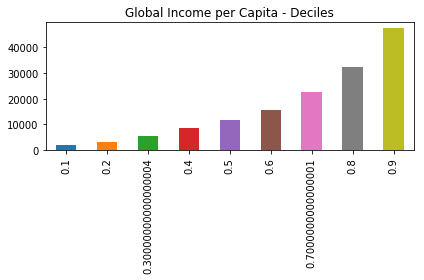

In [30]:
# Generate range of deciles
quantiles = np.arange(.1, .91, .1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

## Getting all the statistics

You can retrieve all major central tendency, dispersion, and shape statistics of a distribution at once with the pandas .describe() method. The default value of its optional percentiles argument corresponds with quartiles, but you can supply your own list of percentiles, as instead:

    DataFrame.describe(percentiles=[.25, .5, .75])

The outputs of .describe() also include the total number of entries in the given series (which can be calculated with .count()), minimum value in the series (which can be calculated with .min()), and maximum value in the series (which can be calculated with .max()).

This exercise will test your knowledge of the metrics and functions covered so far. Which of the following statements regarding the data in the 'Income per Capita' column in income is false?

pandas as pd and numpy as np have been imported for you, and the income DataFrame from the previous exercise is available in your workspace.

## Visualizing international income distribution

seaborn is a Python visualization library for statistical data visualization based on matplotlib.

By default, the distplot() function in the seaborn package creates a histogram, where data is grouped into ranges and and plotted as bars, and fits a kernel density estimation (KDE), or smoothed histogram. You can also use distplot() to create another kind of graph called a rugplot, which adds markers at the bottom of the chart to indicate the density of observations along the x axis.

seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, ...)

In previous exercises, you created a quantile plot which provided a fairly granular sense of the level of income per capita at different points of the distribution. Here, you will use distplot() to get the full picture!

       Income per Capita  Income per Capita (,000)
count         184.000000                184.000000
mean        19469.419566                 18.967391
std         21966.861207                 21.975869
min           618.752859                  0.000000
25%          3922.358940                  3.000000
50%         11620.932520                 11.000000
75%         26558.754670                 26.000000
max        141542.662800                141.000000


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


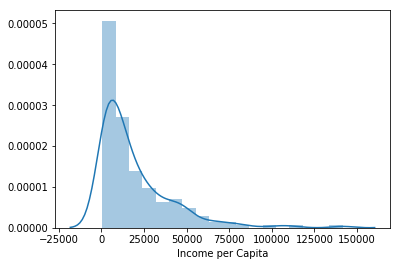

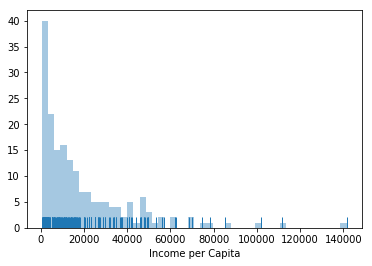

In [31]:
# Import seaborn and matplotlib
import seaborn as sns

# Import matplotlib
import matplotlib.pyplot as plt

# Show the summary statistics for income
print(income.describe())

# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita'])

# Show the plot
plt.show()

# Plot a rugplot
sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

## Growth rates in Brazil, China, and the US

It's time to extend your analysis beyond the levels of international per capita income to the growth rates. The 'income_growth.csv' file contains the growth rates of per capita income over the last 40 years for Brazil, China, and the US.

You will plot the distribution of the historical growth rates for each country on the same chart using a KDE plot to faciliate visual comparison of the ranges of growth that these markets have experienced over this time period.

From here onwards, you should always inspect any DataFrame with .info() in your console even if it isn't explicitly in the instructions!

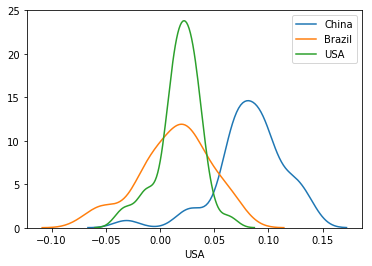

In [32]:
# Load the file into growth
growth = pd.read_csv('income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

# Iterate over the three columns
for column in growth.columns:
    sns.distplot(growth[column], hist=False, label=column)
    
# Show the plot
plt.show()

## Highlighting values in the distribution

Sometimes it is necessary to manipulate your data in order to create a better visualization. Two methods that can take care of missing values are .dropna() and .fillna(). You can also remove outliers by filtering entries that are over or under a certain percentile by applying a condition using .quantile() to a particular column.

You also saw in the video how to emphasize a particular value in a plot by adding a vertical line at position x across the axes:

Axes.axvline(x=0, color=None, ...)

In this exercise, you will take a final look at global income distribution, and then remove outliers above the 95th percentile, plot the distribution, and highlight both the mean and median values.

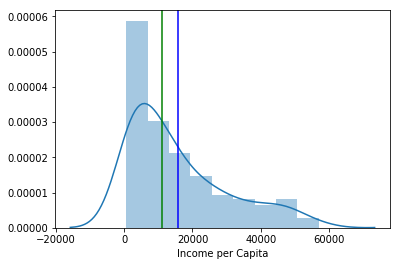

In [33]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(.95)]

# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()

## Companies by sector on all exchanges

A categorical variable is a variable that is one of a limited number of values based on some qualitative property. A frequency distribution is a representation of the number of times that a categorical variable occurs.

Think back to the stock exchange data from the earlier chapters. The .mean() function isn't very helpful for understanding the frequency of 'Sector' values such as 'Technology' and 'Finance', whereas .value_counts() and .nunique() are.

In this exercise, you will compare the distribution of listings in the AMEX, NASDAQ, and NYSE per sector.

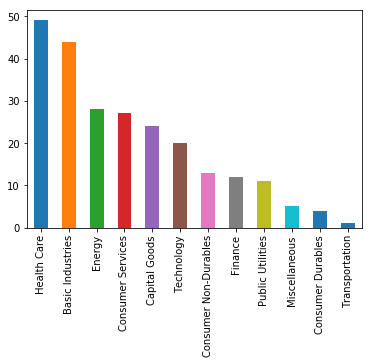

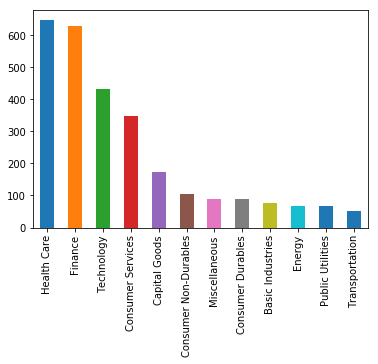

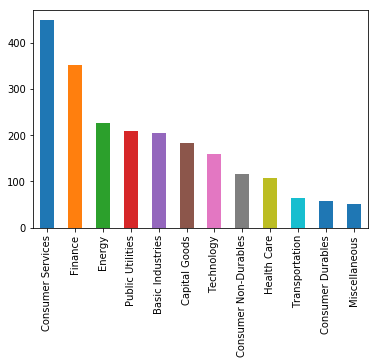

In [37]:
# Create the list exchanges
exchanges = ['amex', 'nasdaq', 'nyse']

# Iterate over exchanges then plot and show result
for exchange in exchanges:
    sectors = listings[exchange].Sector.value_counts()
    # Sort in descending order and plot
    sectors.sort_values(ascending=False).plot(kind='bar')
    # Show the plot
    plt.show()

## Technology IPOs by year on all exchanges

Each company in the listings dictionary has an IPO year between 1972 and 2017. Therefore, in this context, is it appropriate to consider the 'IPO Year' column of each sheet as a categorical variable with a well-defined order even though it is of dtype float64.

Here you will combine data from all three exchanges and plot the distribution of IPO years for companies in the Technology sector. pandas as pd and matplotlib.pyplot as plt have been imported, and the listings dictionary from the previous exercise is in your workspace.

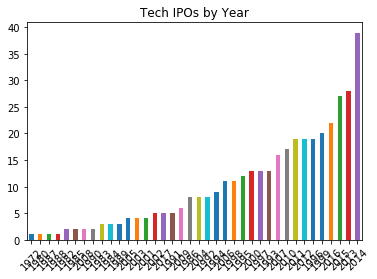

In [38]:
# Create lists
exchanges = ['amex', 'nasdaq', 'nyse']
all_listings = []

# Use for loop to create listing_data
for exchange in exchanges:
    all_listings.append(listings[exchange])
    
# Combine DataFrames
listing_data = pd.concat(all_listings)

# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']

# Create ipo_years
ipo_years = tech_companies['IPO Year']

# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)

# Count values, sort ascending by year, and create a bar plot
ipo_years.value_counts(ascending=True).plot(kind='bar', title='Tech IPOs by Year')

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Aggregating and describing your data by category

## Median market capitalization by sector

Aggregate data is data combined from several measurements. As you learned in the video, the .groupby() function is helpful in aggregating your data by a specific category.

You have seen previously that the market capitalization data has large outliers. To get a more robust summary of the market value of companies in each sector, you will calculate the median market capitalization by sector.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
Exchange                 3147 non-null object
dtypes: float64(3), object(5)
memory usage: 196.8+ KB


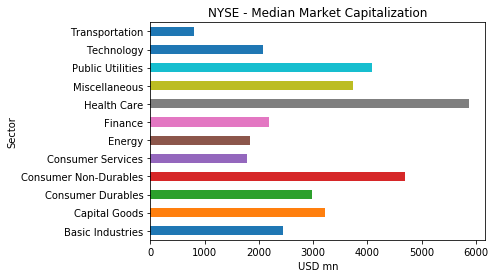

In [39]:
# Inspect NYSE data
nyse.info()

# Create market_cap_m
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)

# Drop market cap column
nyse = nyse.drop('Market Capitalization', axis=1)

# Group nyse by sector
mcap_by_sector = nyse.groupby('Sector')

# Calculate median
median_mcap_by_sector = mcap_by_sector.market_cap_m.median()

# Plot and show as horizontal bar chart
median_mcap_by_sector.plot(kind='barh', title='NYSE - Median Market Capitalization')

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

## Median market capitalization by IPO year

In the last lesson of the previous chapter, you created a timeline for the number of IPOs per year for technology companies.

Let's now analyze how market capitalization has evolved for different IPO years. You can combine data from all three exchanges to get a more comprehensive view.

In [41]:
data = pd.read_excel('listings.xlsx', sheet_name=None)

lists = []
for index, item in data.items():
    item['Exchange'] = index
    lists.append(item)
listings = pd.concat(lists, ignore_index=True)
listings.shape

(6674, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 417.2+ KB
     Stock Symbol                                       Company Name  \
0            XXII                            22nd Century Group, Inc   
1             FAX              Aberdeen Asia-Pacific Income Fund Inc   
2             IAF                 Aberdeen Australia Equity Fund Inc   
3              CH                          Aberdeen Chile Fund, Inc.   
4  ABE             Aberdeen Emerging Markets Smaller Company Oppo...   

   Last Sale  Market Capitalization 

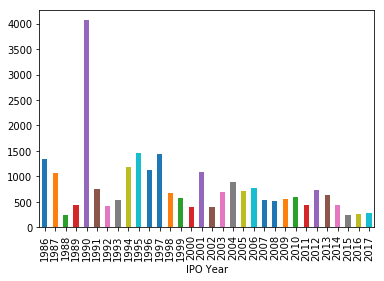

In [42]:
# Inspect listings
listings.info()

# Show listings head
print(listings.head())

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Select companies with IPO after 1985
listings = listings[listings['IPO Year'] > 1985]

# Drop missing values and convert to integers
listings['IPO Year'] = listings['IPO Year'].dropna().astype(int)

# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = listings.groupby('IPO Year').market_cap_m.median().sort_index()

# Plot results as a bar chart
ipo_by_year.plot(kind='bar')

# Show the plot
plt.show()

## All summary statistics by sector

You can apply the various summary statistics that you have learned about in the last chapter to a groupby object to obtain the result on a per-category basis. This includes the .describe() function, which provides several insights all at once!

Here, you will practice this with the NASDAQ listings.

In [43]:
# Inspect NASDAQ data
nasdaq.info()

# Create market_cap_m
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
nasdaq.drop('Market Capitalization', axis=1, inplace=True)

# Group nasdaq by Sector
nasdaq_by_sector = nasdaq.groupby('Sector')

# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

# Print the summary
print(summary)

# Unstack 
summary = summary.unstack()

# Print the summary again
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 8 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
Exchange                 3167 non-null object
dtypes: float64(3), object(5)
memory usage: 198.0+ KB
                      IPO Year                                           \
                         count         mean        std     min      25%   
Sector                                                                    
Basic Industries          30.0  2000.766667  12.516701  1972.0  1993.25   
Capital Goods             77.0  2001.324675  10.593495  1972.0  1993.00   
Consumer Durables         36.0  2003.222222   9.908470  1983.0  1994.75   
Consumer Non-Durabl

## Company value by exchange and sector

You can generate more fine-grained summaries of your data by providing a list of columns inside .groupby() and/or applying a statistical method such as .mean() directly to one or more numerical columns.

Here, you will calculate the median market capitalization for each sector, differentiated by the exchange that the companies are listed on. You will also use .unstack() to pivot the exchange labels from the rows into the columns. It's a good idea to inspect listings in your console before starting the exercise!

Sector            Exchange
Basic Industries  amex         137.318135
                  nasdaq       169.181116
                  nyse        1672.751912
Capital Goods     amex         107.390617
                  nasdaq       477.069539
Name: market_cap_m, dtype: float64


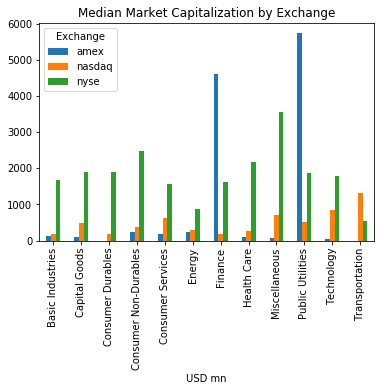

In [44]:
# Group listings by Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

# Display the head of the result
print(mcap_by_sector_exchange.head())

# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()

# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the x label
plt.xlabel('USD mn')

# Show the plot
plt.show()

## Calculate several metrics by sector and exchange

The .agg() function allows you to aggregate your data in even more ways by accepting two kinds of arguments. Providing a list of names of statistical methods calculates more than one summary statistic at once, and providing a dictionary where keys are column names and values are statistical methods applies a particular summary statistic to a designated column.

In this exercise, you will calculate the mean, median, and standard deviation of market capitalizations in millions of USD.

In [45]:
# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg({'Average': 'mean', 'Median': 'median', 'Standard Deviation': 'std'})

# Print the summary
print(summary)

                                     Average       Median  Standard Deviation
Sector                Exchange                                               
Basic Industries      amex        374.323921   137.318135          709.618981
                      nasdaq      824.788760   169.181116         1937.492260
                      nyse       4192.727667  1672.751912         9126.659431
Capital Goods         amex        148.943096   107.390617           95.611487
                      nasdaq     2031.734096   477.069539         6593.280268
                      nyse       5746.444596  1898.473017         8272.670181
Consumer Durables     nasdaq     1045.413873   178.278939         2493.971323
                      nyse       2926.061359  1888.834676         3083.301891
Consumer Non-Durables amex        237.644444   237.644444                 NaN
                      nasdaq     1258.570987   367.018066         1844.221028
                      nyse       6473.559842  2479.639848       

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


## Plot IPO timeline for all exchanges using countplot()

To create a basic visualization of the number of observations per category in a dataset, the seaborn countplot() function is usually the way to go:

    seaborn.countplot(x=None, hue=None, data=None, ...)

The x parameter contains the names of the variables in the data argument, which is the DataFrame to be plotted. hue identifies an additional categorical variable with color. These are three optional parameters out of many accepted by the function; for a full list, check out the seaborn documentation.

Let's use this tool to compare the timeline of IPO activity across the three exchanges.

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


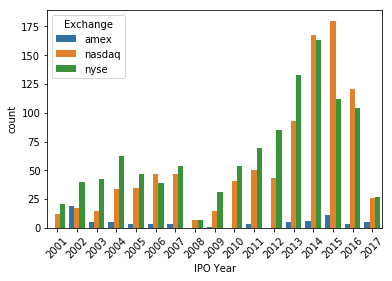

In [46]:
# Select IPOs after 2000
listings = listings[listings['IPO Year'] > 2000]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listings)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Global median per capita income over time

The seaborn barplot() function shows point estimates and confidence intervals as rectangular bars; the default function displays the mean, but it can also represent another summary statistic if you pass a particular numpy function to its estimator parameter:

    seaborn.barplot(x=None, y=None, data=None, estimator=<function mean>, ...)

In this exercise, you will use an imported World Bank dataset containing global income per capita data for 189 countries since the year 2000. To practice displaying summary statistics per category, you will plot and compare the median global income per capita since 2000 to the mean.

pandas as pd, numpy as np, matplotlib.pyplot as plt, and seaborn as sns have been imported. The global income data is available in your workspace in income_trend.

In [58]:
income_trend = pd.read_csv('income_trend.csv', index_col=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959 entries, 0 to 2958
Data columns (total 3 columns):
Country              2959 non-null object
Year                 2959 non-null int64
Income per Capita    2959 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 92.5+ KB


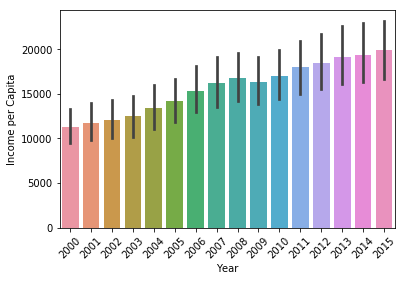

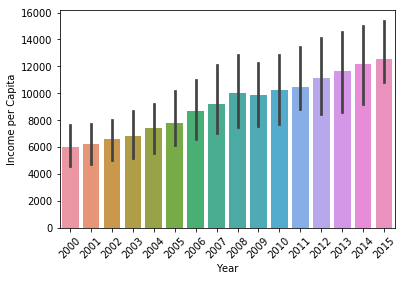

In [59]:
# Inspect the data
income_trend.info()

# Create barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create second barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Calculate several metrics by sector and IPO year

The seaborn pointplot() function facilitates the comparison of summary statistics of a numerical variable for different levels of categorical variables:

    seaborn.pointplot(x=None, y=None, hue=None, data=None, ...)

In the video, you saw a visualization for the market capitalization (the numerical variable) differentiated by whether the IPO (the categorical variable) occurred before (first level) or after (second level) the year 2000.

In this exercise, you will compare the mean market capitalization for each year since 2000 for the NYSE and the NASDAQ, after excluding outliers beyond the 95th percentile.

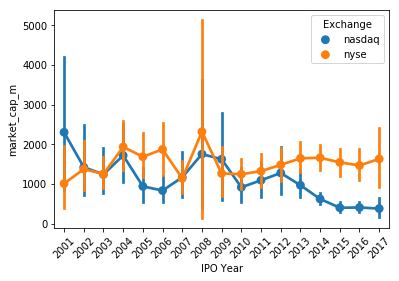

In [60]:
# Import the seaborn library as sns
import seaborn as sns

# Exclude IPOs before 2000 and from the 'amex'
listings = listings[(listings['IPO Year'] > 2000) & (listings.Exchange != 'amex')]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Exclude outliers
listings = listings[listings.market_cap_m < listings.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listings)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Inflation trends in China, India, and the US

Finally, the seaborn package includes functions that allow you to visualize the distribution of levels of categorical variables.

In the next two exercises, you will examine the historical inflation data in China, India, and the US over the past 50+ years in data from FRED. Before jumping into using the functions you have just learned, you should first familiarize yourself with the raw data.

In [62]:
inflation = pd.read_csv('inflation.csv', index_col=0, parse_dates=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174 entries, 1960-01-01 to 2017-01-01
Data columns (total 2 columns):
Country      174 non-null object
Inflation    147 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


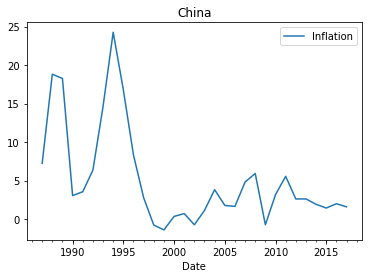

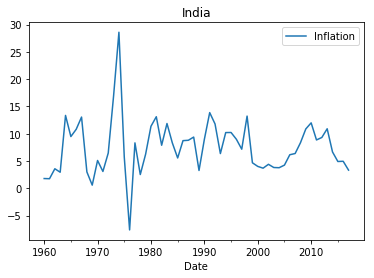

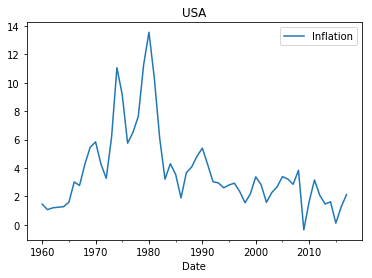

In [63]:

# Inspect the inflation data
inflation.info()

# Create inflation_by_country
inflation_by_country = inflation.groupby('Country')

# Iterate over inflation_by_country and plot the inflation time series per country
for country, data in inflation_by_country:
    # Plot the data
    data.plot(title=country)
    # Show the plot
    plt.show()

## Distribution of inflation rates in China, India, and the US

As you saw in the video, the boxplot() function displays key quantiles of a distribution with respect to categories, where y represents a quantitative variable, and x a categorical variable. In statistics, this kind of distribution is known as a box-and-whisker plot.

A complement to a box plot is a swarmplot(), which draws a categorical scatterplot that displays all categorical observations without overlapping; it takes similar arguments to boxplot():

    seaborn.boxplot(x=None, y=None, data=None, ...)
    seaborn.swarmplot(x=None, y=None, data=None, ...)

In this final exercise, you will compare the historical distributions of inflation rates by country - specifically China, India, and the US - instead of by time series trends.

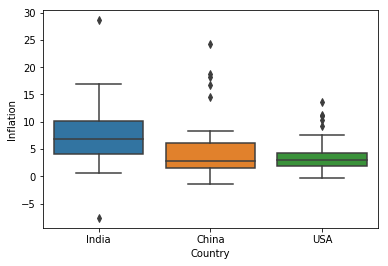

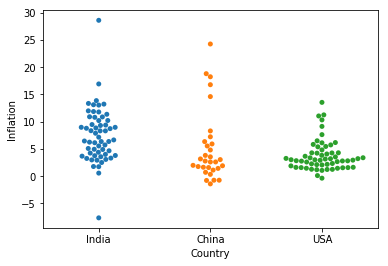

In [64]:
# Create boxplot
sns.boxplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()